In [15]:
install.packages("car")
install.packages("nortest")
install.packages("agricolae")
install.packages("multcomp")
  library(multcomp)
  library(agricolae)
  library(car)
  library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




# Pruebas de ANOVA una via sobe datos de carros y modelo  

              Df Sum Sq Mean Sq F value   Pr(>F)    
Recubrimiento  3 1135.0   378.3   29.79 8.78e-07 ***
Residuals     16  203.2    12.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Conductividad ~ Recubrimiento, data = datos)

$Recubrimiento
     diff        lwr       upr     p adj
b-a  -1.2  -7.648411  5.248411 0.9498881
c-a -14.8 -21.248411 -8.351589 0.0000351
d-a -16.4 -22.848411 -9.951589 0.0000101
c-b -13.6 -20.048411 -7.151589 0.0000930
d-b -15.2 -21.648411 -8.751589 0.0000255
d-c  -1.6  -8.048411  4.848411 0.8917142



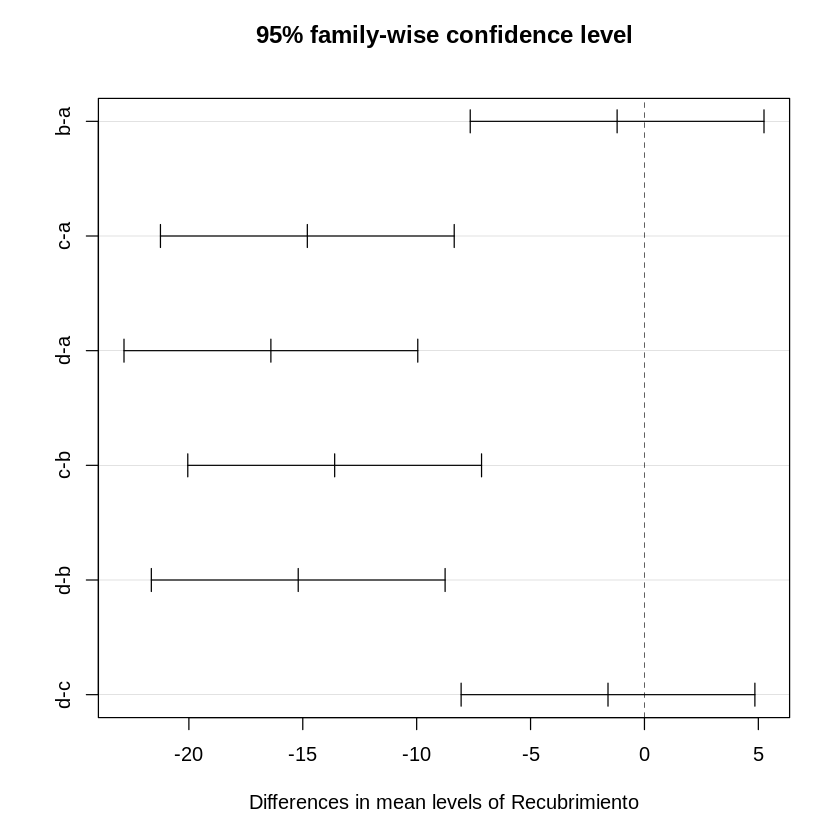

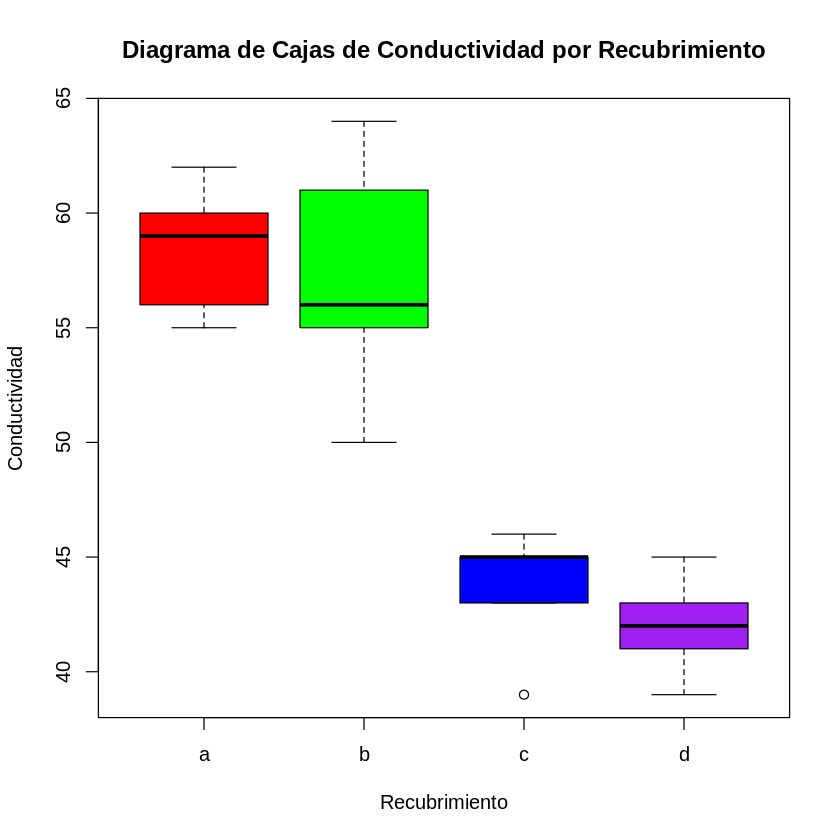

In [7]:
# Crear los datos en un dataframe
datos <- data.frame(
  Conductividad = c(56, 55, 62, 59, 60, 64, 61, 50, 55, 56, 45, 46, 45, 39, 43, 42, 39, 45, 43, 41),
  Recubrimiento = factor(c('a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd'))
)

# Realizar el ANOVA
resultado <- aov(Conductividad ~ Recubrimiento, data = datos)

# Mostrar el resumen del ANOVA
summary(resultado)

# Aplicar la prueba post hoc de Tukey
tukey_result <- TukeyHSD(resultado)

# Mostrar los resultados de la prueba de Tukey
print(tukey_result)

# Para visualizar mejor los resultados
plot(tukey_result)

# Crear el diagrama de cajas
boxplot(Conductividad ~ Recubrimiento, data = datos, main = "Diagrama de Cajas de Conductividad por Recubrimiento",
        xlab = "Recubrimiento", ylab = "Conductividad", col = c("red", "green", "blue", "purple"))


              Df Sum Sq Mean Sq F value   Pr(>F)    
Recubrimiento  3 1135.0   378.3   29.79 8.78e-07 ***
Residuals     16  203.2    12.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Conductividad ~ Recubrimiento, data = datos)

$Recubrimiento
     diff        lwr       upr     p adj
b-a  -1.2  -7.648411  5.248411 0.9498881
c-a -14.8 -21.248411 -8.351589 0.0000351
d-a -16.4 -22.848411 -9.951589 0.0000101
c-b -13.6 -20.048411 -7.151589 0.0000930
d-b -15.2 -21.648411 -8.751589 0.0000255
d-c  -1.6  -8.048411  4.848411 0.8917142



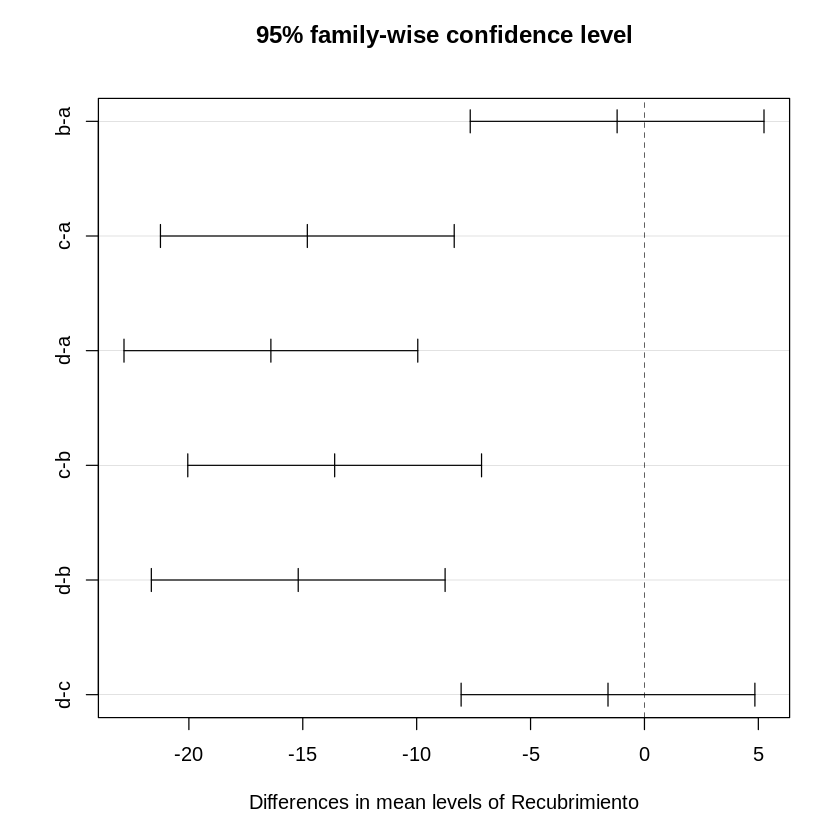

Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3  1.0811 0.3852
      16               

	Anderson-Darling normality test

data:  datos$Conductividad
A = 0.73566, p-value = 0.04613



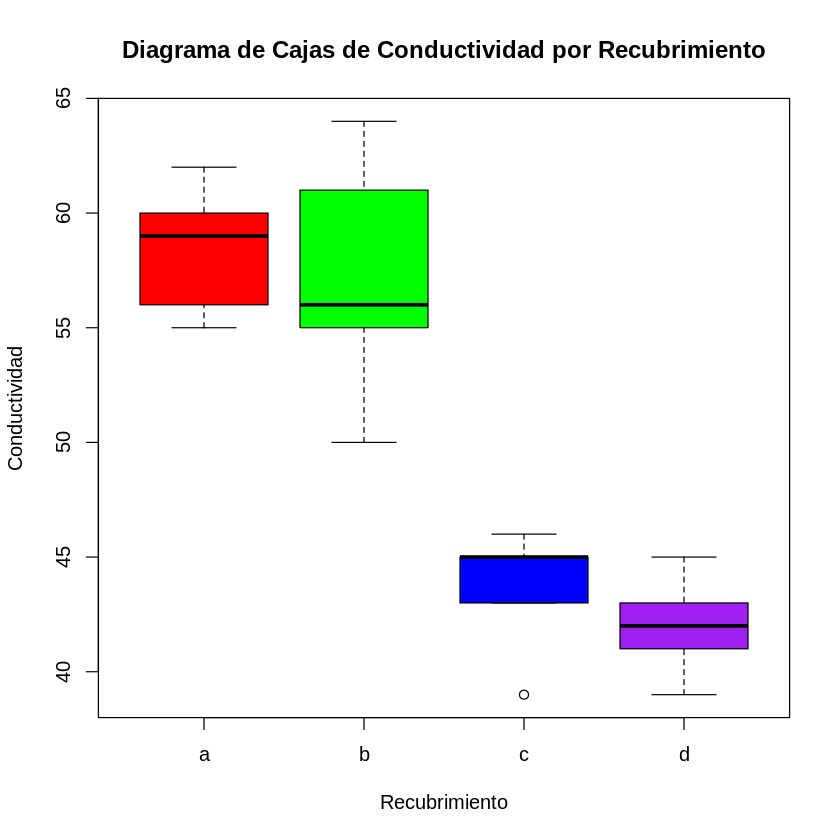

In [8]:
# Realizar el ANOVA
resultado <- aov(Conductividad ~ Recubrimiento, data = datos)

# Mostrar el resumen del ANOVA
summary(resultado)

# Aplicar la prueba post hoc de Tukey
tukey_result <- TukeyHSD(resultado)

# Mostrar los resultados de la prueba de Tukey
print(tukey_result)

# Para visualizar mejor los resultados
plot(tukey_result)

# Crear el diagrama de cajas
boxplot(Conductividad ~ Recubrimiento, data = datos, main = "Diagrama de Cajas de Conductividad por Recubrimiento",
        xlab = "Recubrimiento", ylab = "Conductividad", col = c("red", "green", "blue", "purple"))

# Prueba de Levene
levene_result <- leveneTest(Conductividad ~ Recubrimiento, data = datos)
print(levene_result)

# Prueba de Anderson-Darling
ad_result <- ad.test(datos$Conductividad)
print(ad_result)


In [9]:
# Realizar el ANOVA
resultado <- aov(Conductividad ~ Recubrimiento, data = datos)

# Calcular los residuos
residuos <- residuals(resultado)

# Mostrar los residuos
print(residuos)


            1             2             3             4             5 
-2.400000e+00 -3.400000e+00  3.600000e+00  6.000000e-01  1.600000e+00 
            6             7             8             9            10 
 6.800000e+00  3.800000e+00 -7.200000e+00 -2.200000e+00 -1.200000e+00 
           11            12            13            14            15 
 1.400000e+00  2.400000e+00  1.400000e+00 -4.600000e+00 -6.000000e-01 
           16            17            18            19            20 
 7.833461e-16 -3.000000e+00  3.000000e+00  1.000000e+00 -1.000000e+00 


In [10]:
# Prueba LSD
lsd_result <- LSD.test(resultado, "Recubrimiento", p.adj = "none")

# Mostrar los resultados de la prueba LSD
print(lsd_result)

$statistics
  MSerror Df Mean       CV  t.value      LSD
     12.7 16 50.3 7.084902 2.119905 4.778024

$parameters
        test p.ajusted        name.t ntr alpha
  Fisher-LSD      none Recubrimiento   4  0.05

$means
  Conductividad      std r       se      LCL      UCL Min Max Q25 Q50 Q75
a          58.4 2.880972 5 1.593738 55.02143 61.77857  55  62  56  59  60
b          57.2 5.449771 5 1.593738 53.82143 60.57857  50  64  55  56  61
c          43.6 2.792848 5 1.593738 40.22143 46.97857  39  46  43  45  45
d          42.0 2.236068 5 1.593738 38.62143 45.37857  39  45  41  42  43

$comparison
NULL

$groups
  Conductividad groups
a          58.4      a
b          57.2      a
c          43.6      b
d          42.0      b

attr(,"class")
[1] "group"


In [11]:
# Prueba de Duncan
duncan_result <- duncan.test(resultado, "Recubrimiento")

# Mostrar los resultados de la prueba de Duncan
print(duncan_result)

$statistics
  MSerror Df Mean       CV
     12.7 16 50.3 7.084902

$parameters
    test        name.t ntr alpha
  Duncan Recubrimiento   4  0.05

$duncan
     Table CriticalRange
2 2.997999      4.778024
3 3.143802      5.010397
4 3.234945      5.155653

$means
  Conductividad      std r       se Min Max Q25 Q50 Q75
a          58.4 2.880972 5 1.593738  55  62  56  59  60
b          57.2 5.449771 5 1.593738  50  64  55  56  61
c          43.6 2.792848 5 1.593738  39  46  43  45  45
d          42.0 2.236068 5 1.593738  39  45  41  42  43

$comparison
NULL

$groups
  Conductividad groups
a          58.4      a
b          57.2      a
c          43.6      b
d          42.0      b

attr(,"class")
[1] "group"


In [12]:
scheffe_result <- scheffe.test(resultado, "Recubrimiento")
scheffe_result

$statistics
  MSerror Df        F Mean       CV  Scheffe CriticalDifference
     12.7 16 3.238872 50.3 7.084902 3.117148           7.025696

$parameters
     test        name.t ntr alpha
  Scheffe Recubrimiento   4  0.05

$means
  Conductividad      std r       se Min Max Q25 Q50 Q75
a          58.4 2.880972 5 1.593738  55  62  56  59  60
b          57.2 5.449771 5 1.593738  50  64  55  56  61
c          43.6 2.792848 5 1.593738  39  46  43  45  45
d          42.0 2.236068 5 1.593738  39  45  41  42  43

$comparison
NULL

$groups
  Conductividad groups
a          58.4      a
b          57.2      a
c          43.6      b
d          42.0      b

attr(,"class")
[1] "group"

In [16]:
bonferroni_result <- summary(glht(resultado, linfct = mcp(Recubrimiento = "Tukey")))

# Mostrar los resultados
print(bonferroni_result)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Conductividad ~ Recubrimiento, data = datos)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
b - a == 0   -1.200      2.254  -0.532 0.949869    
c - a == 0  -14.800      2.254  -6.566  < 1e-04 ***
d - a == 0  -16.400      2.254  -7.276  < 1e-04 ***
c - b == 0  -13.600      2.254  -6.034 0.000141 ***
d - b == 0  -15.200      2.254  -6.744  < 1e-04 ***
d - c == 0   -1.600      2.254  -0.710 0.891734    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



In [14]:
# Realizar el test de Kruskal-Wallis
resultado_kruskal_wallis <- kruskal.test(Conductividad ~ Recubrimiento, data = datos)

# Mostrar los resultados
print(resultado_kruskal_wallis)


	Kruskal-Wallis rank sum test

data:  Conductividad by Recubrimiento
Kruskal-Wallis chi-squared = 14.746, df = 3, p-value = 0.002047

